In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS



# text preprocessing
#import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
#import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
#nlp = spacy.load('en', parse=True, tag=True, entity=True)

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')


###### Reading the clean dataset

In [2]:
df=pd.read_csv('C:/Users/Dell/JupyterPythoncodes/FinalProject/cleaned_health_reviews.csv')

In [3]:
df

,Review_Text,Rating,rating_class,clean_text,clues
0,I have mixed feelings about my experience.,4,Good,mixed feeling experience,"['mixed', 'feeling', 'experience']"
1,The staff was caring and attentive. I couldn't...,5,Good,staff care attentive could not happy,"['staff', 'care', 'attentive', 'could', 'not',..."
2,I have mixed feelings about my experience.,5,Good,mixed feeling experience,"['mixed', 'feeling', 'experience']"
3,I have mixed feelings about my experience.,5,Good,mixed feeling experience,"['mixed', 'feeling', 'experience']"
4,The healthcare provider was excellent. I had a...,3,Neutral,healthcare provider excellent great experience,"['healthcare', 'provider', 'excellent', 'great..."
...,...,...,...,...,...
995,My experience was terrible. I would not recomm...,5,Good,experience terrible would not recommend provider,"['experience', 'terrible', 'would', 'not', 're..."
996,The service was disappointing. I won't be comi...,4,Good,service disappointing not come back,"['service', 'disappointing', 'not', 'come', 'b..."
997,"The service was okay, but nothing exceptional.",3,Neutral,service okay nothing exceptional,"['service', 'okay', 'nothing', 'exceptional']"
998,I have mixed feelings about my experience.,5,Good,mixed feeling experience,"['mixed', 'feeling', 'experience']"


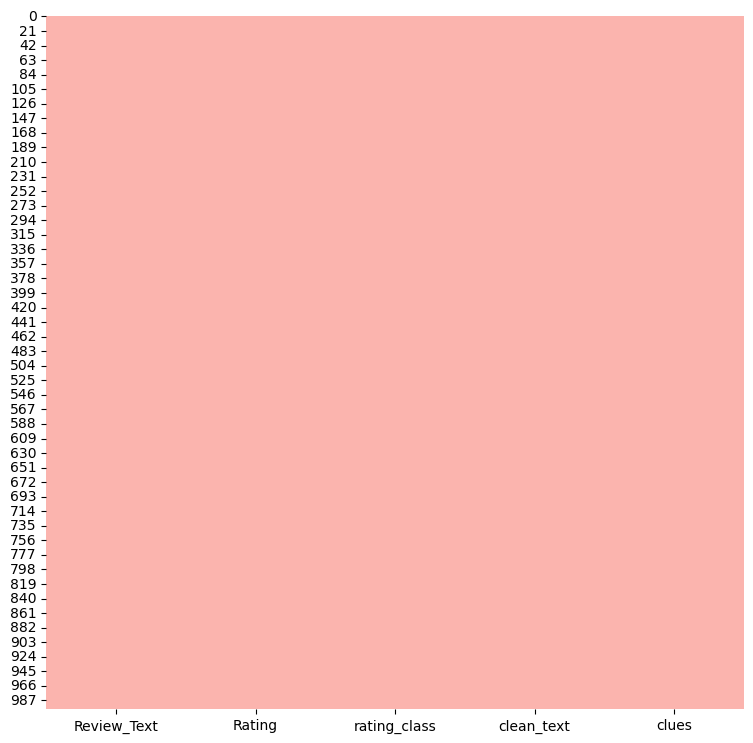

In [4]:
# Check missing value in the dataset
plt.figure(figsize=(9,9))
#sns.set()
ax=sns.heatmap(df.isnull(),cbar=False,cmap='Pastel1')

In [5]:
#There is no missing values

In [6]:
# Print the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Text   1000 non-null   object
 1   Rating        1000 non-null   int64 
 2   rating_class  1000 non-null   object
 3   clean_text    1000 non-null   object
 4   clues         1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [7]:
# Print the describe of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,1000.0,3.058,1.425015,1.0,2.0,3.0,4.0,5.0


In [8]:
# Customer totals for each rating class
df.rating_class.value_counts()

rating_class
Good       434
Bad        398
Neutral    168
Name: count, dtype: int64

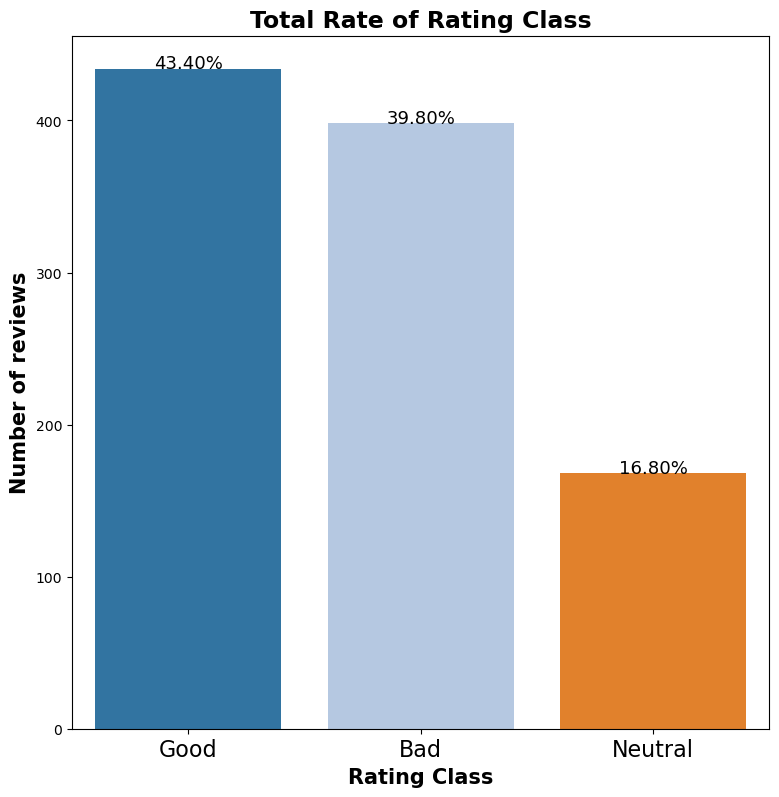

Total Reviews : 1000

Total Rate of Rating Class

rating_class
Good       434
Bad        398
Neutral    168
Name: count, dtype: int64


In [9]:
#Total rate of Rating Class in the health reviews

# Plot the total rate of rating class column
plt.figure(figsize=(9,9))
ax = sns.countplot(x='rating_class',data=df,order=df.rating_class.value_counts().index,palette='tab20')
_  = plt.title('Total Rate of Rating Class', fontsize=17, fontweight='bold')
_  = plt.xticks(fontsize=16)
_  = plt.ylabel('Number of reviews',fontsize=15,fontweight='bold')
_  = plt.xlabel('Rating Class',fontsize=15,fontweight='bold')

# Calculate the percentages of the category
size=[]
total_data = len(df)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height+0.2,
           '{:1.2f}%'.format(height/total_data*100),ha='center',fontsize=13)
    

    
ax.get_figure().savefig('Total_Rate_of_Rating_Class.png', bbox_inches='tight')

# Display the plot
_  = plt.show()



# Total Reviews for each rating class 

print('Total Reviews : {}'.format(len(df.rating_class)))
print('')
print('Total Rate of Rating Class')
print('')
print(df.rating_class.value_counts())


In [10]:
# Check out total number of reviews for each rating class:
df_ratingclass = pd.DataFrame(df.groupby('rating_class')['Review_Text'].count().sort_values())

In [11]:
print(df_ratingclass)

              Review_Text
rating_class             
Neutral               168
Bad                   398
Good                  434


## 1. Feature Engineering and Selection

##  Data Preparation

## Separating Response Variable and Feature
I have separated features(clean text) and response variable(rating class). Features are named as X, and response variable is named as y.

In [12]:
print(df_ratingclass)

              Review_Text
rating_class             
Neutral               168
Bad                   398
Good                  434


In [13]:
rating_class_list=[]

for i in df['rating_class']:
    if i=='Bad':
        rating_class_list.append(0)
    
    else:
        rating_class_list.append(1)
        


In [14]:
print(rating_class_list)

[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 

In [15]:
df['rating_class'].unique()

array(['Good', 'Neutral', 'Bad'], dtype=object)

In [16]:
df['rating_class']=rating_class_list

In [17]:
df['rating_class'].value_counts()


rating_class
1    602
0    398
Name: count, dtype: int64

In [18]:
df.head(3)

,Review_Text,Rating,rating_class,clean_text,clues
0,I have mixed feelings about my experience.,4,1,mixed feeling experience,"['mixed', 'feeling', 'experience']"
1,The staff was caring and attentive. I couldn't...,5,1,staff care attentive could not happy,"['staff', 'care', 'attentive', 'could', 'not',..."
2,I have mixed feelings about my experience.,5,1,mixed feeling experience,"['mixed', 'feeling', 'experience']"


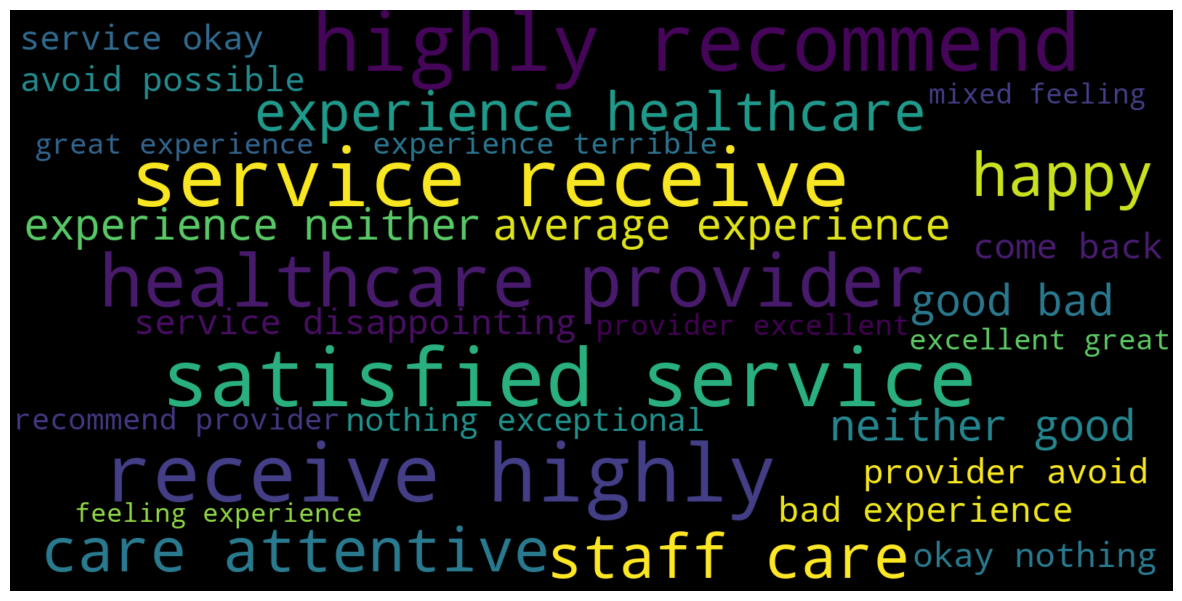

In [19]:
consolidated=' '.join(word for word in df['clean_text'][df['rating_class']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


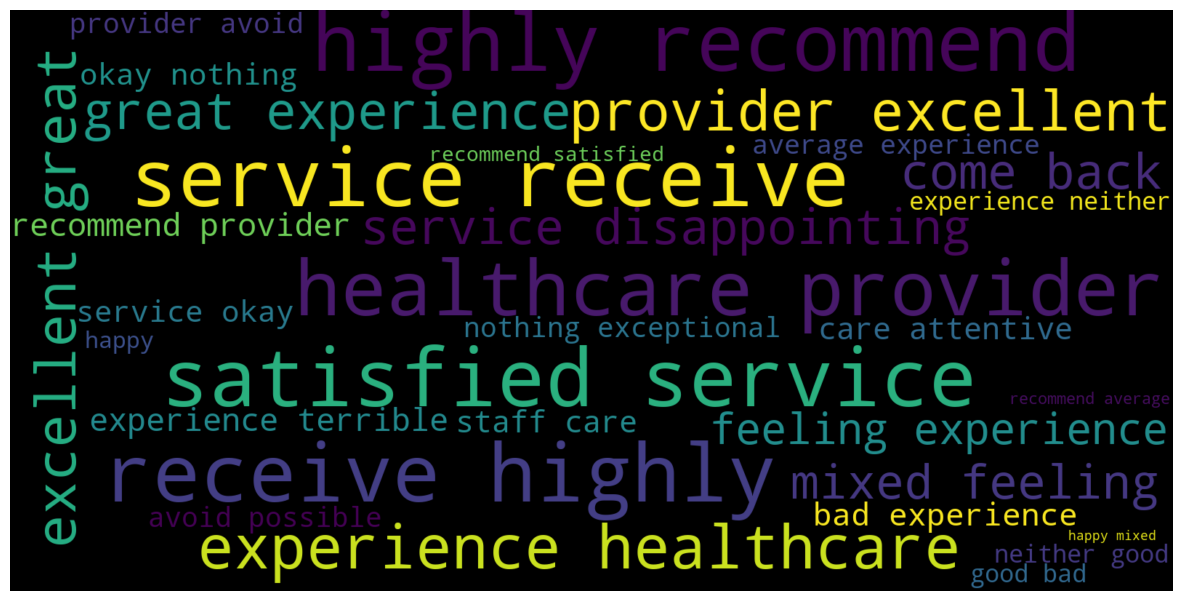

In [20]:
consolidated=' '.join(word for word in df['clean_text'][df['rating_class']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


# Exploratory Data Analysis Summary:

In this exploratory analysis, I have analyzed three specific rating categories: good, bad and neutral in which I have merged good and neutral rating as 1 and separated bad rating as 0. The analysis shows that the reviews are almost duplicatedas we have seen earlier only 9 reviews are unique, so I have not deleted duplicated reviews due to small dataset and less information since cannot afford to delete it and even ratings are not matching with the reviews sentiment given by the customer.
For Example:
1. My experience was terrible. I would not recommend this provider -- Rating given is 4
2. The service was disappointing. I won't be coming back -- Rating given is 5


The number of good ratings(3-5) are 602  bad ratings(0-2) are 398. 

Total 9 reviews text are used with different ratings 
1. "provider excellent","satisfied service","staff care","highly recommend", "experience healthcare" are used as good reviews, 2. "bad experience","disappointing service","provider avoid","experience terrible" are the bad reviews given most of the time. 
3. Maximum reviewtext is like "mixed feeling, neither good nor bad" where rating is given 3,4,5 for the same reviewtext.

# Recommendation:

Data is very small and the information provided is very less try to make review section bit easy by providing clear drop down, containing options like staff, doctors, infrastructure etc so that reviews will be clear and easy for the cusomer to rate the service without their wastage of time.

# Understanding

According to my understanding provider and staff is satisfactory but some improvement is required in the management for providing smooth service to the customer.


## Splitting Dataset into Train Test Set
After that, I have divided the data into the training and test sets. 20% of dataset will be my testing set and 80% of the dataset will be the training set. To make sure to have consistent results, I also set the random state of the split.

In [21]:
# Splitting the Data Set into Train and Test Sets
X = df['clean_text']
y = df['rating_class']

X.shape

(1000,)

In [22]:
# Split Dataset into train and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.20,random_state=42,stratify=y)

In [23]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(800,)
Test Set Shape		:(200,)


## 4. Choosing the Right Evaluation Metric 

Because I have a data imbalance in my case, I need to perform the evaluation of the classifier performance by using sufficient metrics to take the class distribution into account and to give a closer look to the minority class. Given that, I have used f1 score that is harmonic average of precision and recall it as evaluation metric. 
It is important to understand what types of errors in our model. In order to visualize the types of potential errors in the model, I use Confusion Matrix. It compares the predictions of my model with the true label. So, l use this matrix along with evaluation matrix, f1 score. 

## Confusion Matrix Plot Function
Understanding the types of errors our model makes, and least desirable are important . A good way to visualize that information is using a Confusion Matrix, which compares the predictions our model makes with the true label. With that in mind, we used confusion matrix besides our evaluation metric (f1 score).

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.summer):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [25]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    
    
    
    plt.show()

## 5. Model Building
This problem is a supervised binary classification problem. My analysis aims to develop a model that can classify sentiments in healthcare reviews based on the reviews written by the service taker. I used Python’s Scikit Learn libraries to solve the problem. In this case, I performed Logistic Regression, Random Forest and Naive Bayes algorithms .

Because the ratings on the reviews were not normally distributed, I decreased rating categories from 5 to 2 by merging Rating 1 and 2 and rename as ‘Bad’ and merging Rating 4 and 5 and rename as 'Good'. I dropped Rating 3 from the dataset due to the reason l mentioned above.

For feature selection purposes, I applied threshold for word occurrence by using min_df/max_df. For feature engineering purposes, I applied CountVectorizer, TF-IDF and Hashing Vectorizer to the text data so l can convert a collection of text documents into numerical feature vectors.

# CountVectorizer Bag of Words
Vectorization is a general process of converting a collection of text documents into numerical feature vectors. This particular strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Word occurrences describe documents while disregarding the relative position information of the words in the document. "CountVectorizer" performs both tokenization and occurrence counting in a single class.

In [26]:
# Create the word vector with CountVectorizer
#count_vect = CountVectorizer(ngram_range=(1,1),min_df=0.0005)
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [27]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names_out()))

Vocabulary length : 32


###### Creating a function for applying different algorithms

In [28]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names_out()


In [29]:
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test,ytrain=y_train):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

# Support vector classifier

In [30]:
from sklearn.svm import SVC
modeling(SVC(kernel='linear', random_state=42))

# Assign y_pred to a variable for further process
y_pred_cv_svc = y_pred

f1 score: 0.44999999999999996


In [31]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_svc))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.60      1.00      0.75       120

    accuracy                           0.60       200
   macro avg       0.30      0.50      0.37       200
weighted avg       0.36      0.60      0.45       200



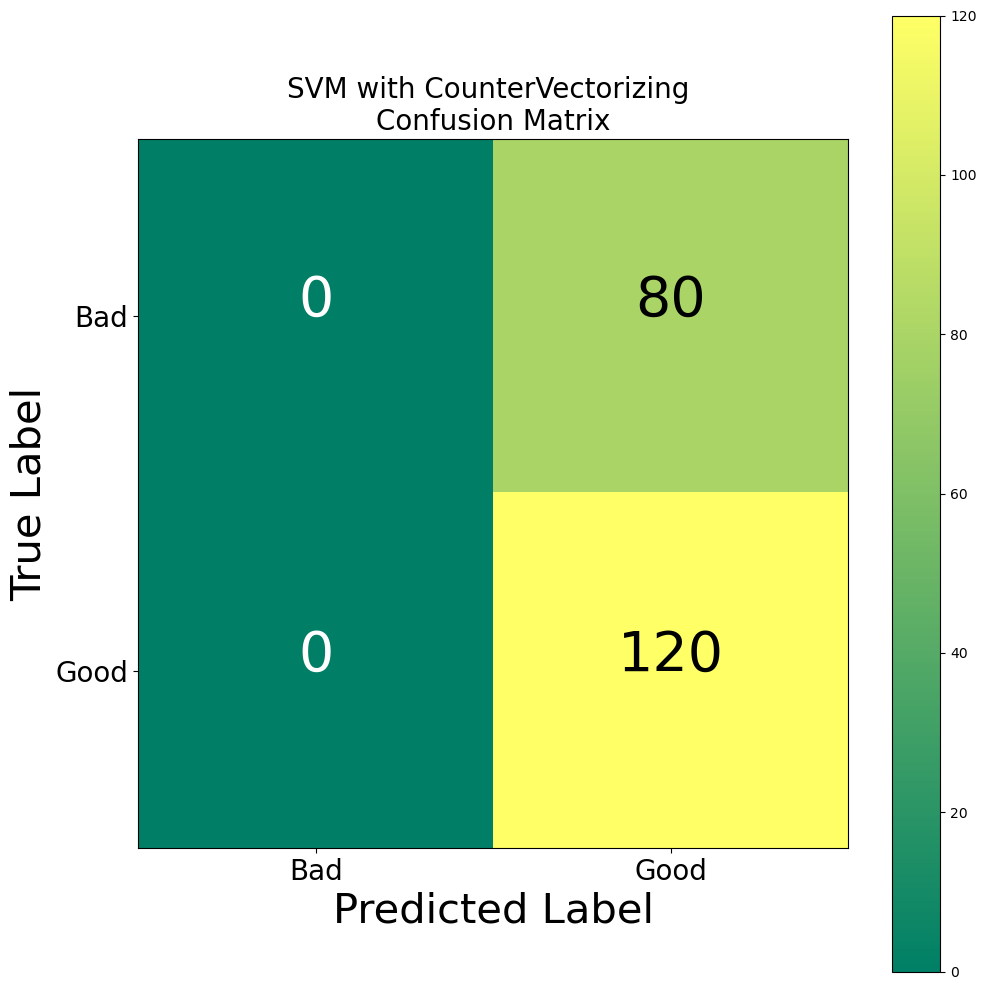

In [32]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_svc, "SVM")

##### Logistic Regression with CountVectorizer

In [33]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'auto', 
                            solver = 'liblinear',
                            n_jobs=-1, 
                            class_weight = 'balanced',
                            random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred


f1 score: 0.5371765476580412


###### Classification Report

In [34]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))


              precision    recall  f1-score   support

           0       0.42      0.33      0.37        80
           1       0.61      0.70      0.65       120

    accuracy                           0.55       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.53      0.55      0.54       200



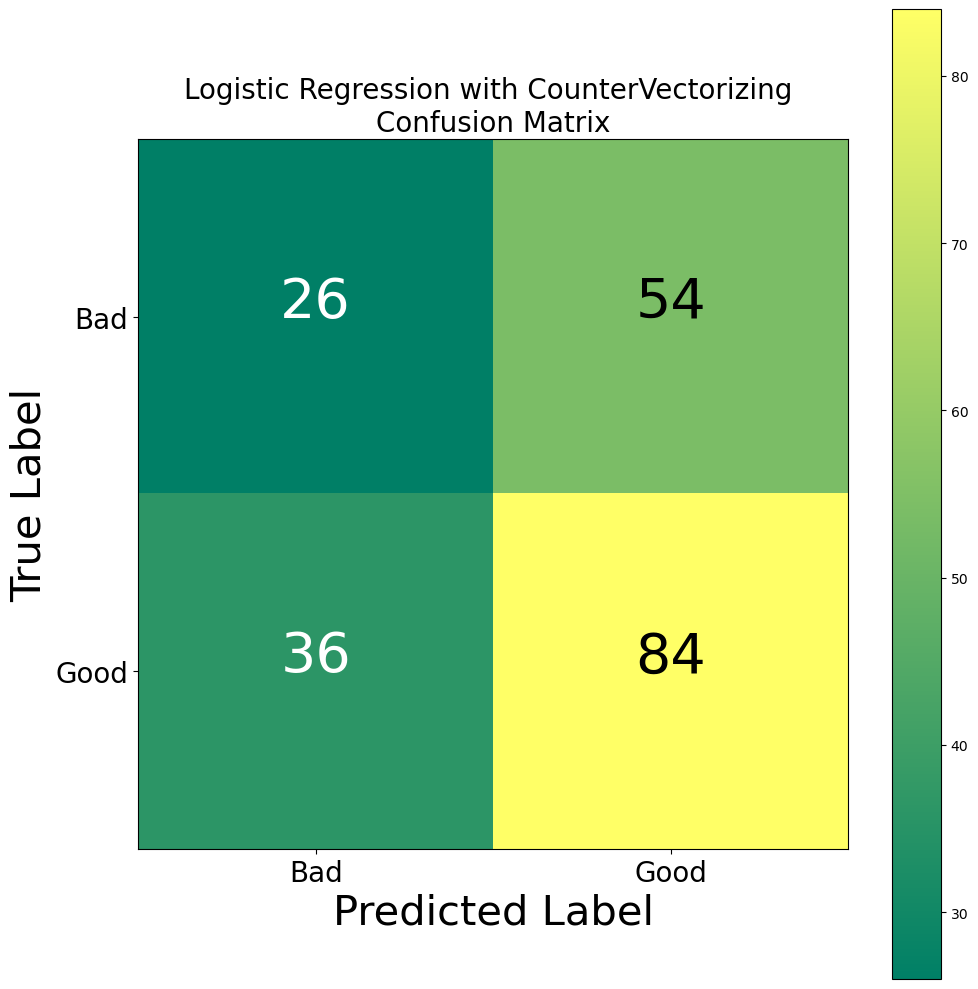

In [35]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

## Naive Bayes with CountVectorizer

In [36]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred


f1 score: 0.5181118057443146


In [37]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.41      0.19      0.26        80
           1       0.60      0.82      0.69       120

    accuracy                           0.56       200
   macro avg       0.50      0.50      0.47       200
weighted avg       0.52      0.56      0.52       200



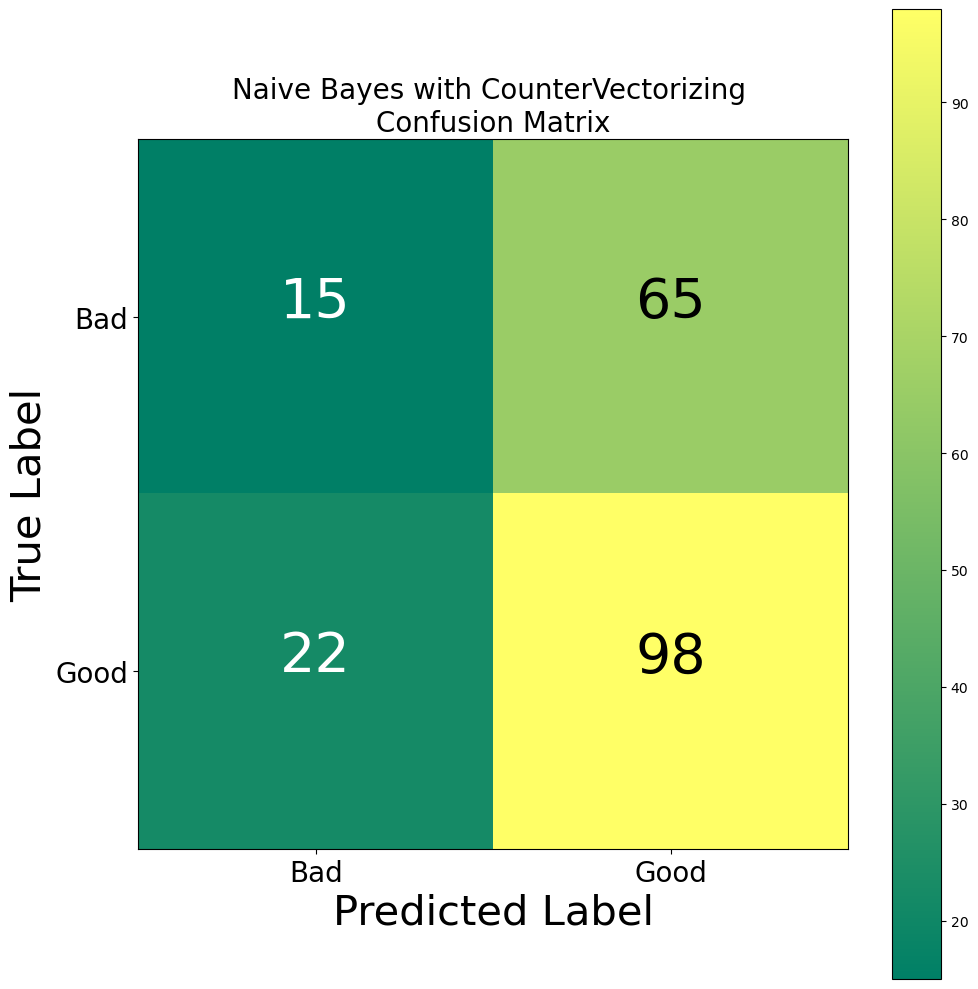

In [38]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

In [39]:
# Random Forest

In [40]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 100, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.44999999999999996


In [41]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.60      1.00      0.75       120

    accuracy                           0.60       200
   macro avg       0.30      0.50      0.37       200
weighted avg       0.36      0.60      0.45       200



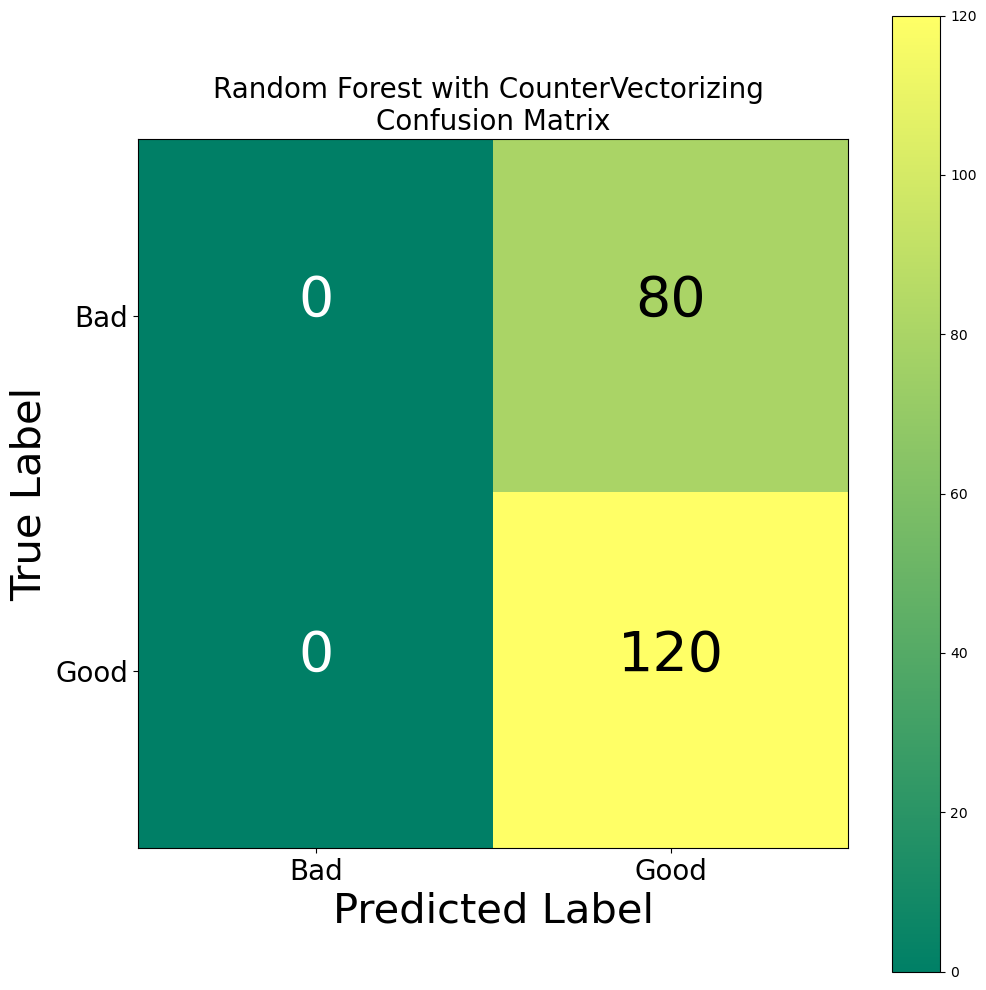

In [42]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")


###### Functions for Algorithms Comparison

In [43]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [44]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

###### Function for f1 Score Plotting

In [45]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

###### Algorithms Comparison with CountVectorizer

In [46]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_nb, y_pred_cv_rf, y_pred_cv_svc], 
                labels = ['LogReg', 'Naive Bayes','RandomForest','Support Vector Machine'])

In [47]:
df_tv2

precision    recall  \
vectorizer model                  accuracy class                          
CountVect  LogReg                 0.550    bad       0.419355  0.325000   
                                           good      0.608696  0.700000   
                                           average   0.532959  0.550000   
           Naive Bayes            0.565    bad       0.405405  0.187500   
                                           good      0.601227  0.816667   
                                           average   0.522898  0.565000   
           RandomForest           0.600    bad       0.000000  0.000000   
                                           good      0.600000  1.000000   
                                           average   0.360000  0.600000   
           Support Vector Machine 0.600    bad       0.000000  0.000000   
                                           good      0.600000  1.000000   
                                           average   0.360000  0.600000   

                                                    f1-score  support  
vectorizer model                  accuracy class                       
CountVect  LogReg                 0.550    bad      0.366197     80.0  
                                           good     0.651163    120.0  
                                           average  0.537177    200.0  
           Naive Bayes            0.565    bad      0.256410     80.0  
                                           good     0.692580    120.0  
                                           average  0.518112    200.0  
           RandomForest           0.600    bad      0.000000     80.0  
                                           good     0.750000    120.0  
                                           average  0.450000    200.0  
           Support Vector Machine 0.600    bad      0.000000     80.0  
                                           good     0.750000    120.0  
                                           average  0.450000    200.0

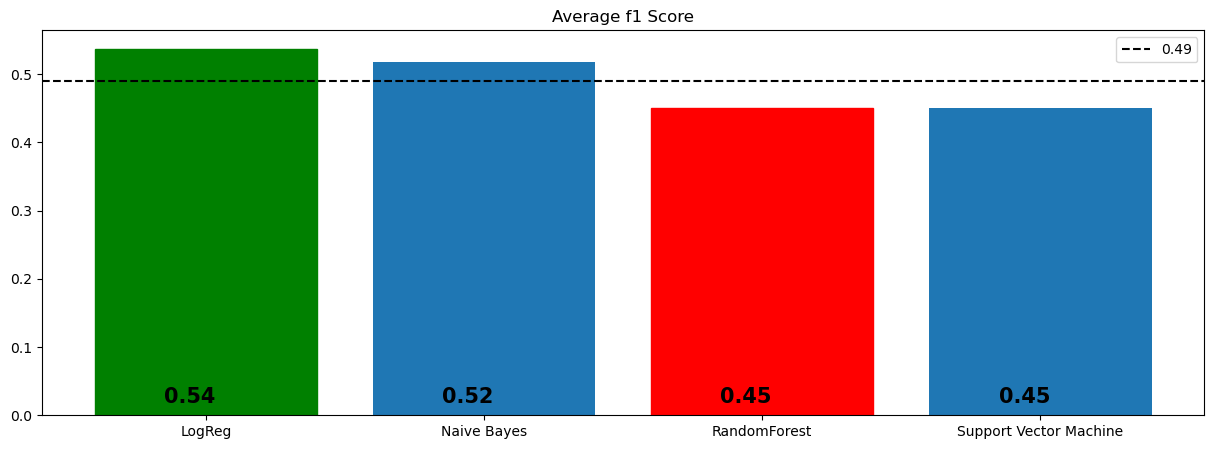

In [48]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

# LogReg is the winner with 0.54 score.
# Modeling require large data and more unique dataset etc 

In [49]:
#import neccessary packages
from collections import Counter
from imblearn.over_sampling import SMOTE

# oversampling using SMOTE
sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(count_vect_train,y_train)

df_text=X_train
df_target=y_train

# Print shape of X_train andy_train
print(df_text.shape)
print(df_target.shape)

(964, 32)
(964,)


In [50]:
Counter(y_train) # Alternative way we can use `df_target.value_counts()`

Counter({0: 482, 1: 482})

In [51]:
# Call the modeling function for logistic regression 
modeling(LogisticRegression(multi_class = 'auto', solver = 'liblinear', 
                            class_weight = 'balanced',
                            random_state = 42), Xtrain = df_text, ytrain = df_target)
# Print f1 score

y_pred_sm_logreg=y_pred

# multi_class = 'auto',
#                             max_iter=1000, 
#                             solver='liblinear', 
#                             tol=0.1,
#                             n_jobs=-1, 
#                             C = 100,
#                             penalty='l1'

f1 score: 0.5243895085921012


In [52]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_sm_logreg))

              precision    recall  f1-score   support

           0       0.42      0.56      0.48        80
           1       0.63      0.49      0.55       120

    accuracy                           0.52       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.55      0.52      0.52       200



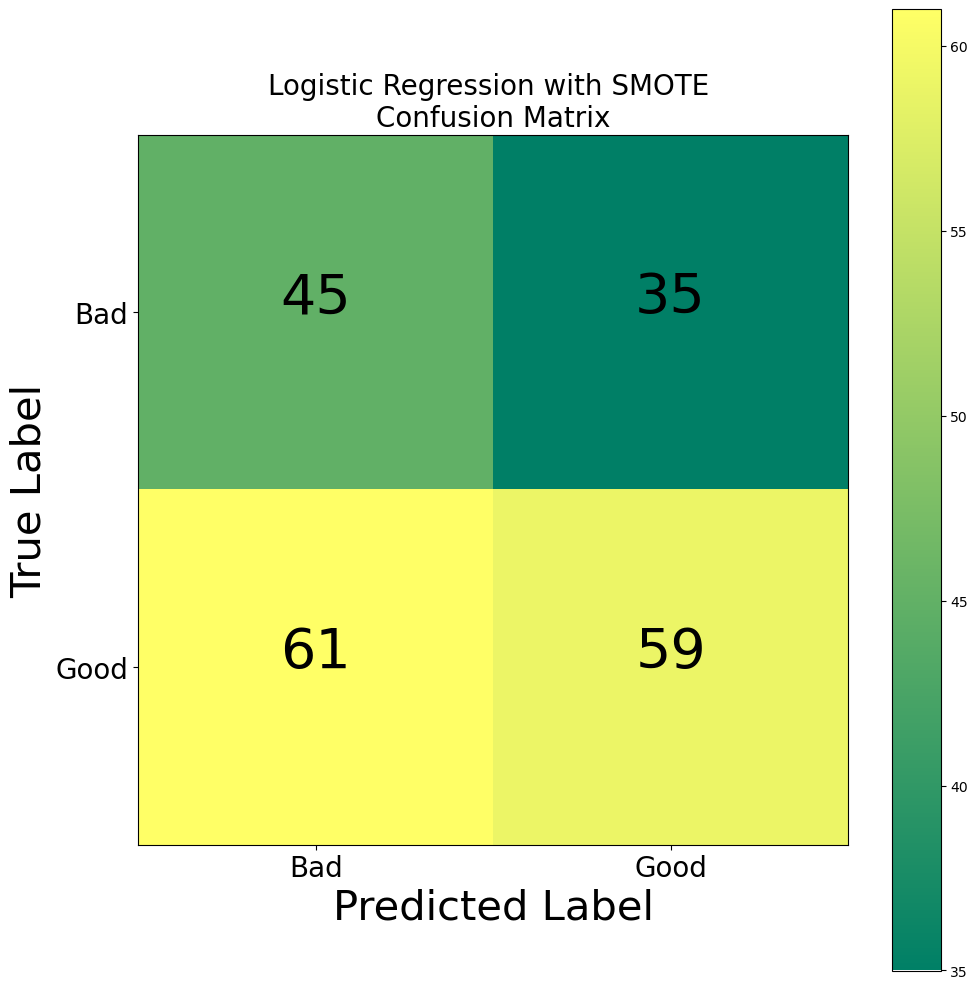

In [53]:
# Print confusion matrix for logistic regression 
disp_confusion_matrix(y_pred_sm_logreg, "Logistic Regression", "SMOTE")

#### Naive Bayes


In [54]:
# Call the modeling function for naive bayes 
modeling(MultinomialNB(), Xtrain = df_text, ytrain = df_target)

# Print f1 score
y_pred_sm_nb = y_pred

f1 score: 0.5371765476580412


In [55]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_sm_nb))

              precision    recall  f1-score   support

           0       0.42      0.33      0.37        80
           1       0.61      0.70      0.65       120

    accuracy                           0.55       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.53      0.55      0.54       200



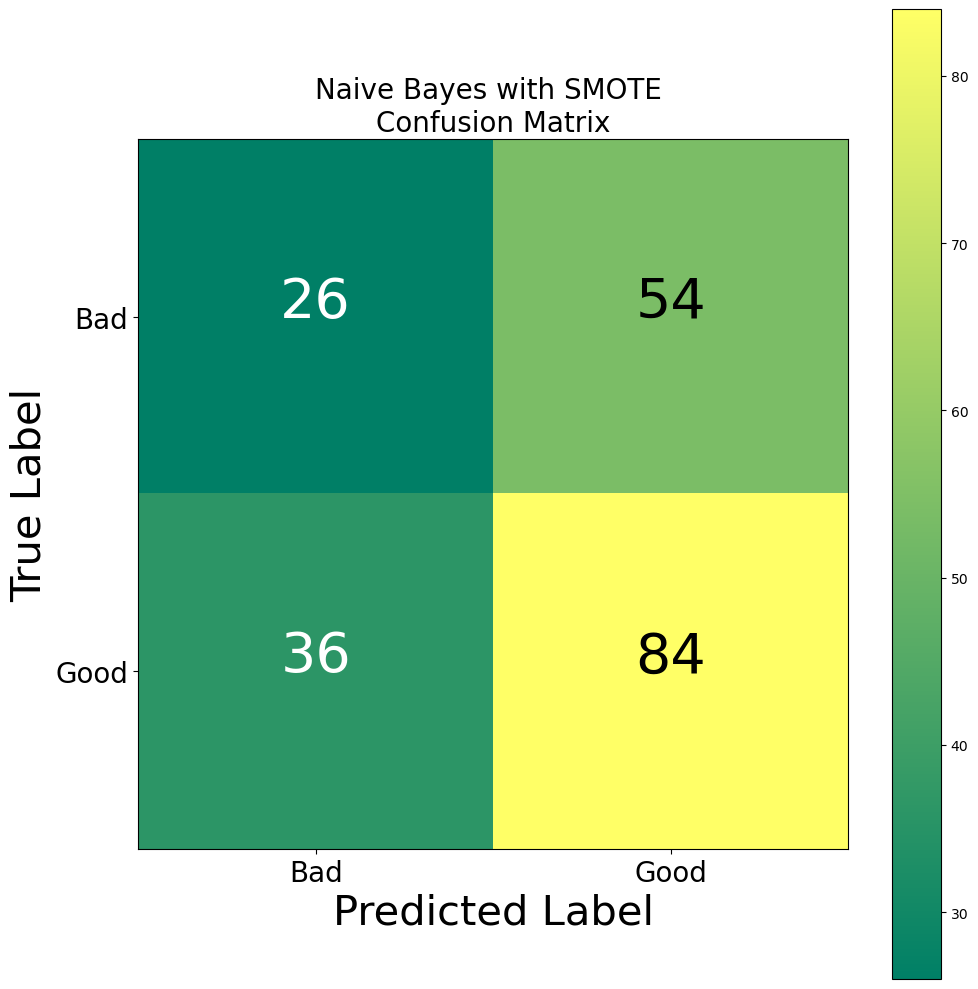

In [56]:
# Print confusion matrix for naive bayes
disp_confusion_matrix(y_pred_sm_nb, "Naive Bayes", "SMOTE")

In [57]:
# Call the modeling function for random forest classifier 
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         Xtrain = df_text, ytrain = df_target)

# Print f1 score
y_pred_sm_rf = y_pred

f1 score: 0.5243895085921012


In [58]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_sm_rf))

              precision    recall  f1-score   support

           0       0.42      0.56      0.48        80
           1       0.63      0.49      0.55       120

    accuracy                           0.52       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.55      0.52      0.52       200



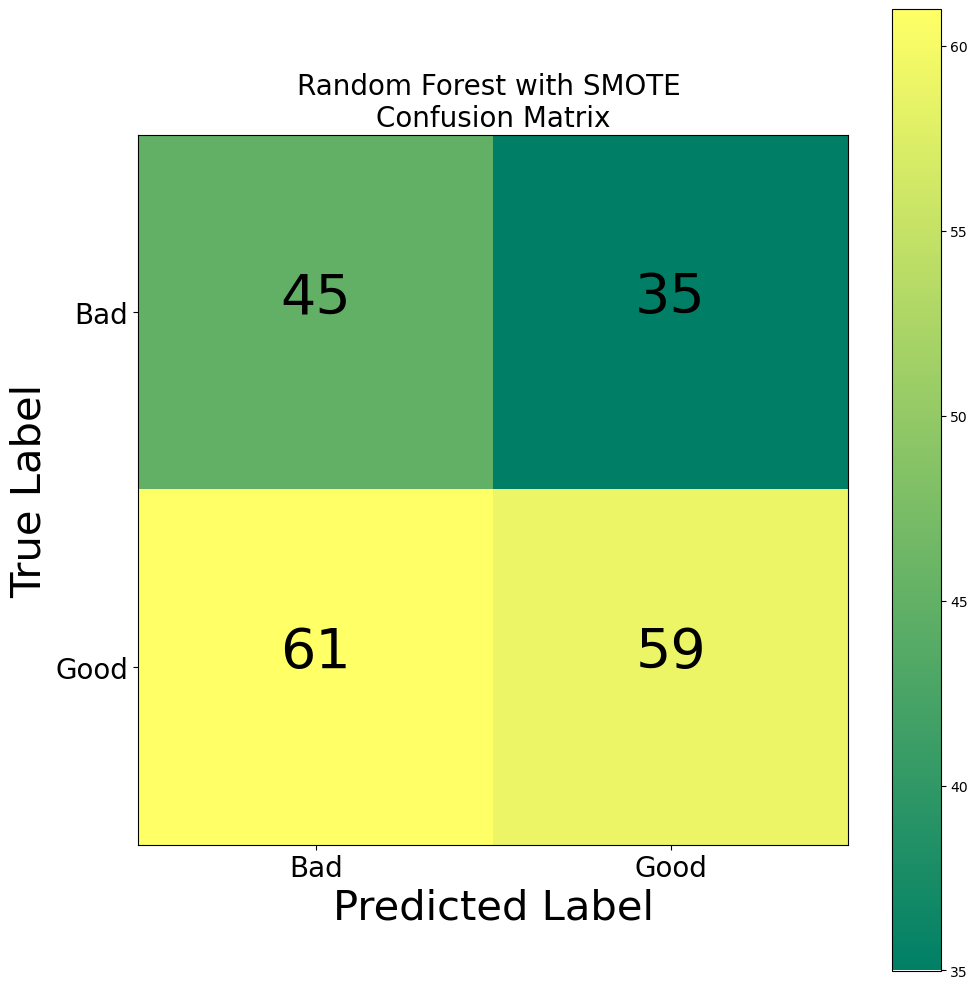

In [59]:
# Print confusion matrix for random forest classifier
disp_confusion_matrix(y_pred_sm_rf, "Random Forest", "SMOTE")

In [60]:
# Call the modeling function for random forest classifier 
modeling(SVC(kernel='linear', random_state=42), 
         Xtrain = df_text, ytrain = df_target)



# Assign y_pred to a variable for further process
y_pred_sm_svc = y_pred


f1 score: 0.5243895085921012


In [61]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_sm_svc))

              precision    recall  f1-score   support

           0       0.42      0.56      0.48        80
           1       0.63      0.49      0.55       120

    accuracy                           0.52       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.55      0.52      0.52       200



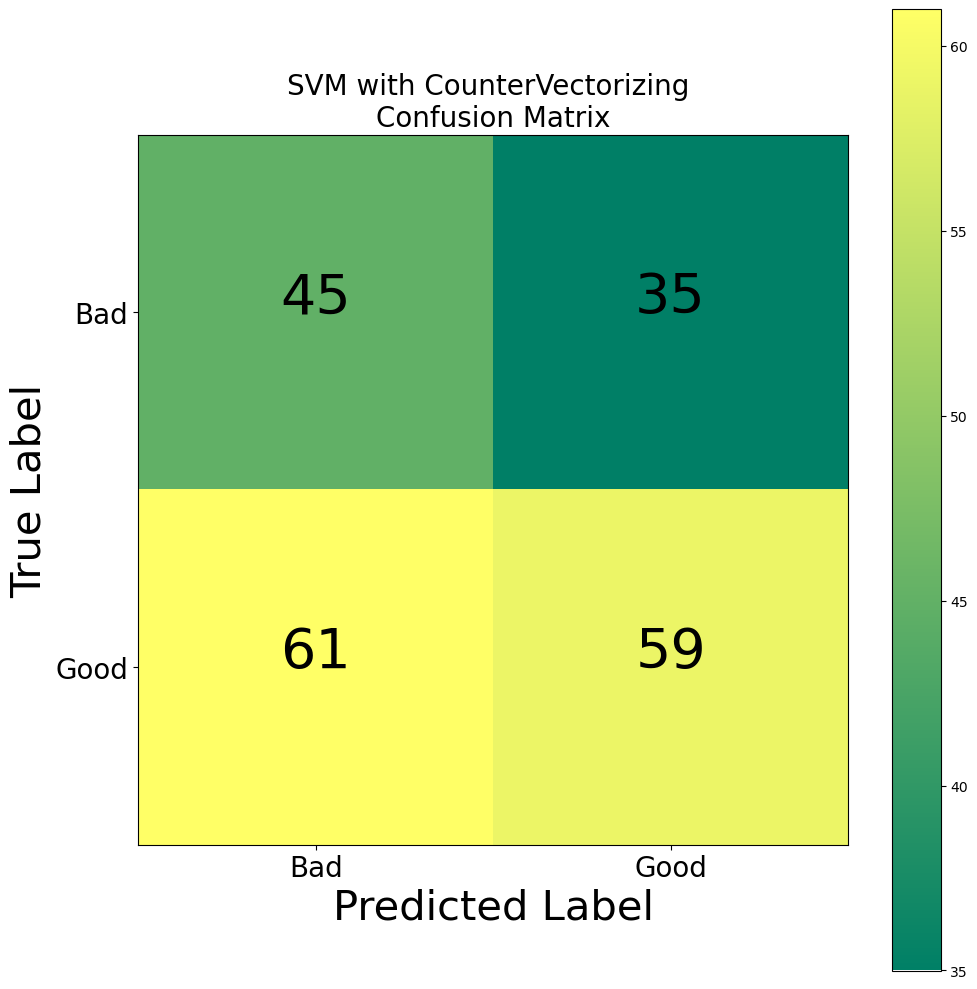

In [62]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_sm_svc, "SVM")

### 5.2.6 Comparison of SMOTE Models

In [63]:
comparison_table(y_preds = [y_pred_sm_logreg, y_pred_sm_nb,y_pred_sm_rf,y_pred_sm_svc], 
                 labels = ['LogReg','Naive Bayes','RandomForest','SVC'] )

In [64]:
# Print the comparision matrix
print('\nComparision Matrix of Modeling with SMOTE\n')
df_tv2


Comparision Matrix of Modeling with SMOTE



precision    recall  f1-score  \
vectorizer model        accuracy class                                    
CountVect  LogReg       0.52     bad       0.424528  0.562500  0.483871   
                                 good      0.627660  0.491667  0.551402   
                                 average   0.546407  0.520000  0.524390   
           Naive Bayes  0.55     bad       0.419355  0.325000  0.366197   
                                 good      0.608696  0.700000  0.651163   
                                 average   0.532959  0.550000  0.537177   
           RandomForest 0.52     bad       0.424528  0.562500  0.483871   
                                 good      0.627660  0.491667  0.551402   
                                 average   0.546407  0.520000  0.524390   
           SVC          0.52     bad       0.424528  0.562500  0.483871   
                                 good      0.627660  0.491667  0.551402   
                                 average   0.546407  0.520000  0.524390   

                                          support  
vectorizer model        accuracy class             
CountVect  LogReg       0.52     bad         80.0  
                                 good       120.0  
                                 average    200.0  
           Naive Bayes  0.55     bad         80.0  
                                 good       120.0  
                                 average    200.0  
           RandomForest 0.52     bad         80.0  
                                 good       120.0  
                                 average    200.0  
           SVC          0.52     bad         80.0  
                                 good       120.0  
                                 average    200.0

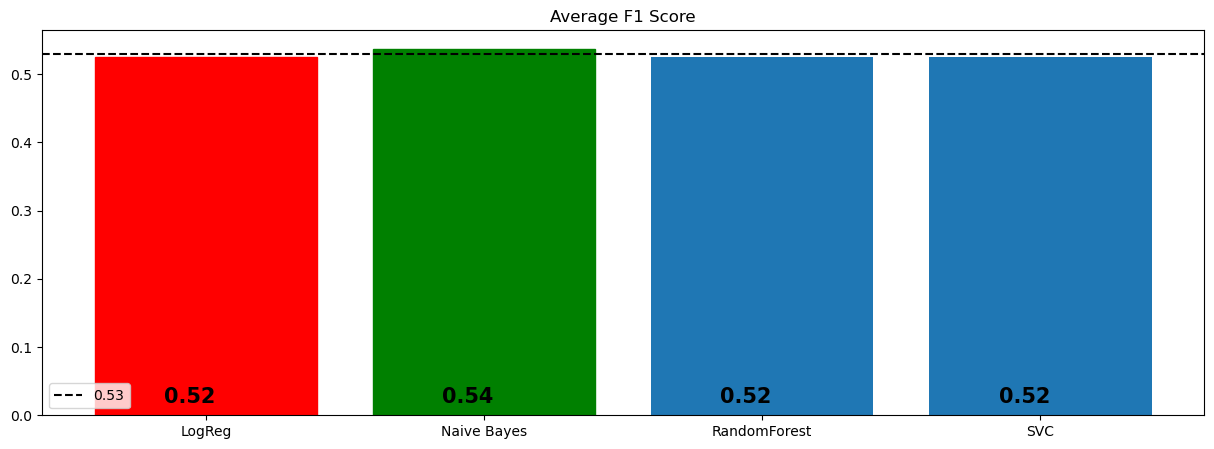

In [65]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

In [66]:
# After using smote Naive Bayes is the winner with 0.54 averge f1 score but still this score is not good as it require unique and large dataset

# Due to small data set and and duplicated value cannot achive good score and since it is medical dataset I have not preferred to change it.

In [74]:
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# cv = TfidfVectorizer(max_features=2500)

# X = cv.fit_transform(df['clean_text'] ).toarray()
# y = df['rating_class']
X_train = df_text
y_train = df_target

#X_train, X_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.2, random_state=42)

# Create a parameter grid
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

# Create a pipeline with logistic regression
pipe = make_pipeline(LogisticRegression(max_iter=1000, solver='liblinear', tol=0.1))

clf= GridSearchCV(pipe, param_grid, cv=300, n_jobs=-1,scoring=['accuracy', 'f1', 'precision', 'recall'],refit="accuracy")

# Fit the model
#clf.fit(X, y)
clf.fit(X_train,y_train)
#Print best parameters and best score
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)

cv_results = clf.cv_results_
#print(cv_results)
#sorted(clf.cv_results_.keys())

Best Parameters: {'logisticregression__C': 100, 'logisticregression__penalty': 'l1'}
Best Score: 0.5402777777777777


In [75]:
cv_results

{'mean_fit_time': array([0.00450736, 0.00502081, 0.00466207, 0.00531159, 0.00492105,
        0.0049259 , 0.00464391, 0.00473361]),
 'std_fit_time': array([0.00272526, 0.00329721, 0.00226719, 0.00343861, 0.00379163,
        0.00259959, 0.00290092, 0.00248772]),
 'mean_score_time': array([0.0224688 , 0.01902749, 0.0194308 , 0.02042996, 0.02040137,
        0.01973586, 0.01884954, 0.01848188]),
 'std_score_time': array([0.00754951, 0.00531272, 0.00574094, 0.00629571, 0.00682154,
        0.00575547, 0.00653039, 0.0049459 ]),
 'param_logisticregression__C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_logisticregression__penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'logisticre

In [76]:


# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'auto',
                            max_iter=1000, 
                            solver='liblinear', 
                            tol=0.1,
                            n_jobs=-1, 
                            C = 100,
                            penalty='l1',
                            class_weight = 'balanced',
                            random_state = 42),Xtrain = df_text, ytrain = df_target)
                            

# Assign y_pred to a variable for further process
y_pred_hp_logreg=y_pred



f1 score: 0.5243895085921012


In [77]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hp_logreg))


              precision    recall  f1-score   support

           0       0.42      0.56      0.48        80
           1       0.63      0.49      0.55       120

    accuracy                           0.52       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.55      0.52      0.52       200



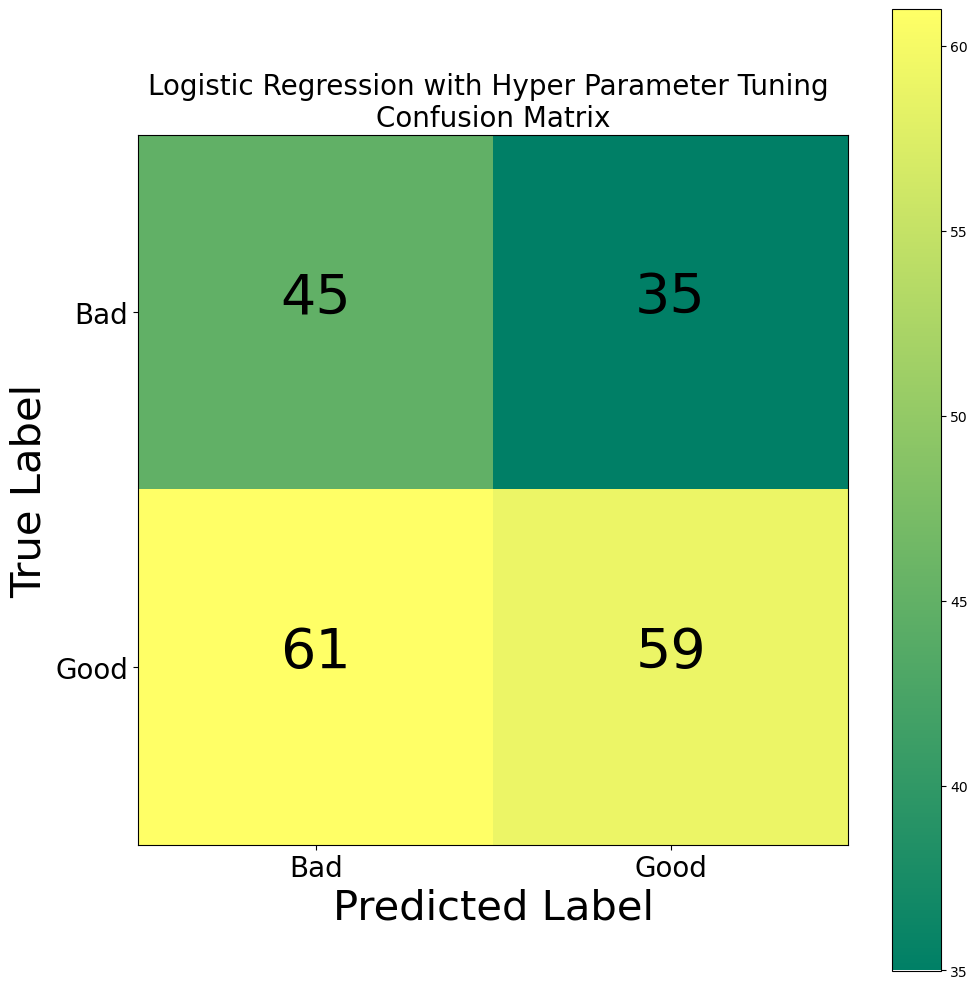

In [78]:
# Print confusion matrix for logistic regression 
disp_confusion_matrix(y_pred_hp_logreg, "Logistic Regression", "Hyper Parameter Tuning")

In [ ]:
# After doing hyper paramter tuning also not able to get good score its means the model require proper data set to achieve good score 